In [1]:
from hstrat import hstrat
from matplotlib import pyplot as plt
from matplotlib import ticker
from nbmetalog import nbmetalog as nbm
import random
from teeplot import teeplot as tp

from hstrat1x import hstrat as hstrat1x


In [2]:
nbm.print_metadata()


context: ci
hostname: 6ba40c58a217
interpreter: 3.8.10 (default, May 26 2023, 14:05:08)  [GCC 9.4.0]
nbcellexec: 2
nbname: drip_plot
nbpath: /opt/hereditary-stratigraph-concept/binder/retention-policies/drip_plot.ipynb
revision: null
session: 50e68744-a2da-4546-93a8-0345e581a086
timestamp: 2023-08-13T01:47:38Z00:00


IPython==7.16.1
keyname==0.4.1
yaml==5.3.1
hstrat==0.3.2
hstrat1x==1.7.4
matplotlib==3.3.2
nbmetalog==0.2.6
teeplot==0.2.0
re==2.2.1
ipython_genutils==0.2.0
logging==0.5.1.2
zmq==22.3.0
json==2.0.9
ipykernel==5.5.3


In [3]:
def tweak_and_show():
    plt.grid(which='major', linewidth=1)
    plt.grid(which='minor', linewidth=1, linestyle=":")
    loc = ticker.MultipleLocator(base=256.0) # this locator puts ticks at regular intervals
    plt.gca().yaxis.set_major_locator(loc)
    plt.gca().xaxis.set_major_locator(loc)
    loc = ticker.MultipleLocator(base=64.0) # this locator puts ticks at regular intervals
    plt.gca().yaxis.set_minor_locator(loc)
    plt.gca().xaxis.set_minor_locator(loc)


In [4]:
def tweaked_stratum_retention_drip_plot(*args, **kwargs):
    hstrat.stratum_retention_drip_plot(*args, **kwargs)
    tweak_and_show()


# Perfect Resolution Policy


teeplots/num_layers=1024+stratum_retention_predicate=perfect-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/num_layers=1024+stratum_retention_predicate=perfect-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.png


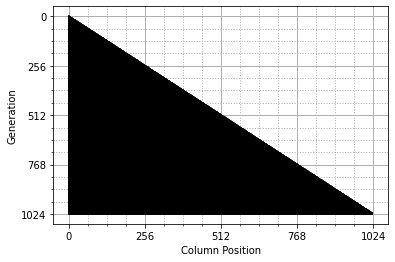

In [5]:
num_layers = 1024
tp.tee(
    tweaked_stratum_retention_drip_plot,
    do_show=False,
    stratum_retention_predicate=hstrat.StratumRetentionPredicatePerfectResolution(),
    num_generations=num_layers,
    teeplot_outattrs={
        **nbm.collate_outattr_metadata(),
        **{
            'num_layers' : num_layers,
            'stratum_retention_predicate' : 'perfect-resolution',
        },
    }
)


# Nominal Resolution Policy


teeplots/num_layers=1024+stratum_retention_predicate=nominal-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/num_layers=1024+stratum_retention_predicate=nominal-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.png


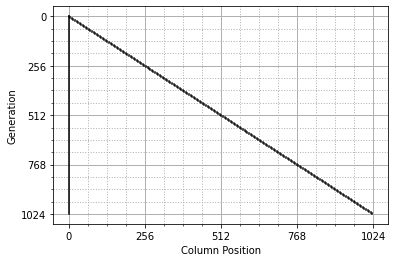

In [6]:
num_layers = 1024
tp.tee(
    tweaked_stratum_retention_drip_plot,
    do_show=False,
    stratum_retention_predicate=hstrat.StratumRetentionPredicateNominalResolution(),
    num_generations=num_layers,
    teeplot_outattrs={
        **nbm.collate_outattr_metadata(),
        **{
            'num_layers' : num_layers,
            'stratum_retention_predicate' : 'nominal-resolution',
        },
    }
)


# Stochastic Policy


teeplots/num_layers=1024+stratum_retention_predicate=stochastic+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/num_layers=1024+stratum_retention_predicate=stochastic+viz=tweaked-stratum-retention-drip-plot+ext=.png


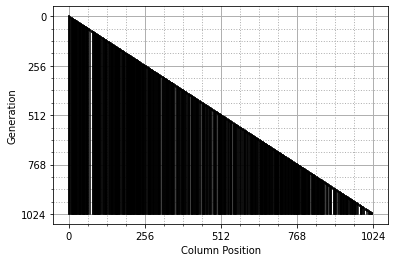

In [7]:
num_layers = 1024
tp.tee(
    tweaked_stratum_retention_drip_plot,
    do_show=False,
    stratum_retention_predicate=hstrat.StratumRetentionPredicateStochastic(),
    num_generations=num_layers,
    teeplot_outattrs={
        **nbm.collate_outattr_metadata(),
        **{
            'num_layers' : num_layers,
            'stratum_retention_predicate' : 'stochastic',
        },
    }
)


teeplots/num_layers=128+stratum_retention_predicate=stochastic+viz=stratum-retention-drip-plot+ext=.pdf
teeplots/num_layers=128+stratum_retention_predicate=stochastic+viz=stratum-retention-drip-plot+ext=.png


<AxesSubplot:xlabel='Column Position', ylabel='Generation'>

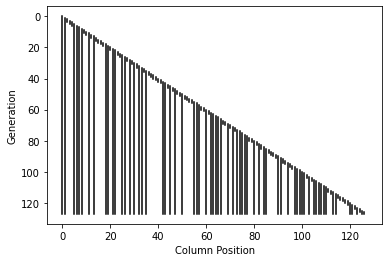

In [8]:
num_layers = 128
tp.tee(
    hstrat.stratum_retention_drip_plot,
    do_show=False,
    stratum_retention_predicate=hstrat.StratumRetentionPredicateStochastic(),
    num_generations=num_layers,
    teeplot_outattrs={
        **nbm.collate_outattr_metadata(),
        **{
            'num_layers' : num_layers,
            'stratum_retention_predicate' : 'stochastic',
        },
    }
)


# Recency-proportional Resolution Policy


teeplots/guaranteed_mrca_recency_proportional_resolution=0+num_layers=1024+stratum_retention_predicate=recency-proportional-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/guaranteed_mrca_recency_proportional_resolution=0+num_layers=1024+stratum_retention_predicate=recency-proportional-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.png
teeplots/guaranteed_mrca_recency_proportional_resolution=4+num_layers=1024+stratum_retention_predicate=recency-proportional-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/guaranteed_mrca_recency_proportional_resolution=4+num_layers=1024+stratum_retention_predicate=recency-proportional-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.png


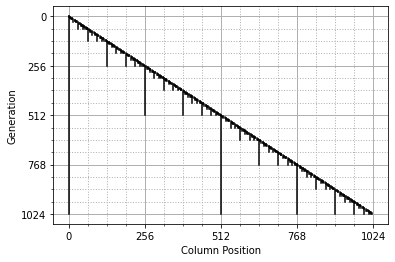

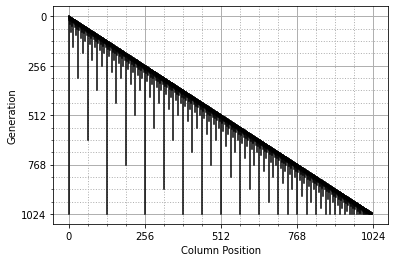

In [9]:
num_layers = 1024
for guaranteed_mrca_recency_proportional_resolution in 0, 4:
    tp.tee(
        tweaked_stratum_retention_drip_plot,
        do_show=False,
        stratum_retention_predicate=hstrat.StratumRetentionPredicateRecencyProportionalResolution(
                guaranteed_mrca_recency_proportional_resolution=guaranteed_mrca_recency_proportional_resolution,
        ),
        num_generations=num_layers,
        teeplot_outattrs={
            **nbm.collate_outattr_metadata(),
            **{
                'guaranteed_mrca_recency_proportional_resolution' : guaranteed_mrca_recency_proportional_resolution,
                'num_layers' : num_layers,
                'stratum_retention_predicate' : 'recency-proportional-resolution',
            },
        }
    )


# Depth-proportional Resolution Policy


teeplots/guaranteed_depth_proportional_resolution=1+num_layers=1024+stratum_retention_predicate=depth-proportional-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/guaranteed_depth_proportional_resolution=1+num_layers=1024+stratum_retention_predicate=depth-proportional-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.png
teeplots/guaranteed_depth_proportional_resolution=4+num_layers=1024+stratum_retention_predicate=depth-proportional-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/guaranteed_depth_proportional_resolution=4+num_layers=1024+stratum_retention_predicate=depth-proportional-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.png


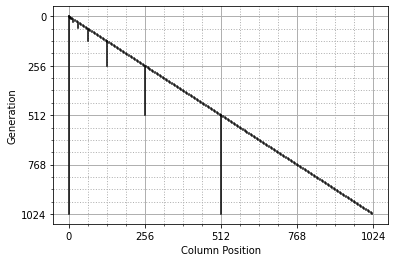

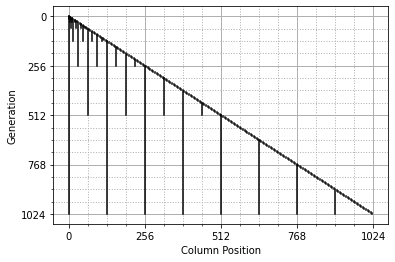

In [10]:
num_layers = 1024
for guaranteed_depth_proportional_resolution in 1, 4:
    tp.tee(
        tweaked_stratum_retention_drip_plot,
        do_show=False,
        stratum_retention_predicate=hstrat.StratumRetentionPredicateDepthProportionalResolution(
            guaranteed_depth_proportional_resolution=guaranteed_depth_proportional_resolution,
        ),
        num_generations=num_layers,
        teeplot_outattrs={
            **nbm.collate_outattr_metadata(),
            **{
                'guaranteed_depth_proportional_resolution' : guaranteed_depth_proportional_resolution,
                'num_layers' : num_layers,
                'stratum_retention_predicate' : 'depth-proportional-resolution',
            },
        }
    )


teeplots/guaranteed_depth_proportional_resolution=1+num_layers=1024+stratum_retention_predicate=tapered-depth-proportional-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/guaranteed_depth_proportional_resolution=1+num_layers=1024+stratum_retention_predicate=tapered-depth-proportional-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.png
teeplots/guaranteed_depth_proportional_resolution=4+num_layers=1024+stratum_retention_predicate=tapered-depth-proportional-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/guaranteed_depth_proportional_resolution=4+num_layers=1024+stratum_retention_predicate=tapered-depth-proportional-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.png


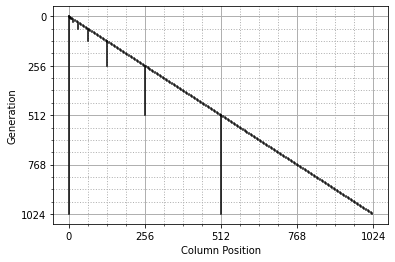

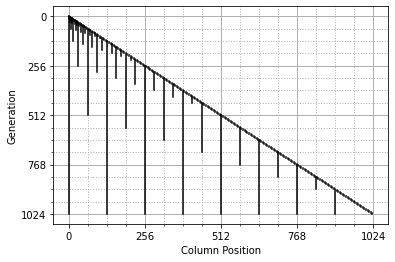

In [11]:
num_layers = 1024
for guaranteed_depth_proportional_resolution in 1, 4:
    tp.tee(
        tweaked_stratum_retention_drip_plot,
        do_show=False,
        stratum_retention_predicate=hstrat.StratumRetentionPredicateTaperedDepthProportionalResolution(
            guaranteed_depth_proportional_resolution=guaranteed_depth_proportional_resolution,
        ),
        num_generations=num_layers,
        teeplot_outattrs={
            **nbm.collate_outattr_metadata(),
            **{
                'guaranteed_depth_proportional_resolution' : guaranteed_depth_proportional_resolution,
                'num_layers' : num_layers,
                'stratum_retention_predicate' : 'tapered-depth-proportional-resolution',
            },
        }
    )


# Fixed Resolution Policy


teeplots/fixed_resolution=512+num_layers=1024+stratum_retention_predicate=fixed-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/fixed_resolution=512+num_layers=1024+stratum_retention_predicate=fixed-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.png
teeplots/fixed_resolution=128+num_layers=1024+stratum_retention_predicate=fixed-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/fixed_resolution=128+num_layers=1024+stratum_retention_predicate=fixed-resolution+viz=tweaked-stratum-retention-drip-plot+ext=.png


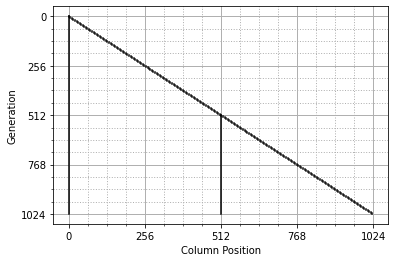

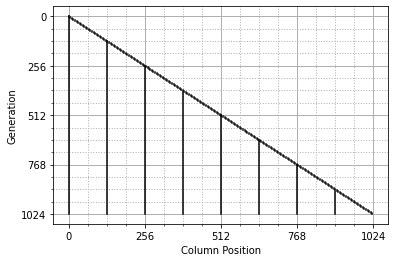

In [12]:
num_layers = 1024
for fixed_resolution in 512, 128:
    tp.tee(
        tweaked_stratum_retention_drip_plot,
        do_show=False,
        stratum_retention_predicate=hstrat.StratumRetentionPredicateFixedResolution(fixed_resolution),
        num_generations=num_layers,
        teeplot_outattrs={
            **nbm.collate_outattr_metadata(),
            **{
                'num_layers' : num_layers,
                'fixed_resolution' : fixed_resolution,
                'stratum_retention_predicate' : 'fixed-resolution',
            },
        }
    )


# Geometric Sequence Nth Root Policy


teeplots/num_layers=1024+r=4+stratum_retention_predicate=geom-seq-nth-root+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/num_layers=1024+r=4+stratum_retention_predicate=geom-seq-nth-root+viz=tweaked-stratum-retention-drip-plot+ext=.png
teeplots/num_layers=1024+r=8+stratum_retention_predicate=geom-seq-nth-root+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/num_layers=1024+r=8+stratum_retention_predicate=geom-seq-nth-root+viz=tweaked-stratum-retention-drip-plot+ext=.png


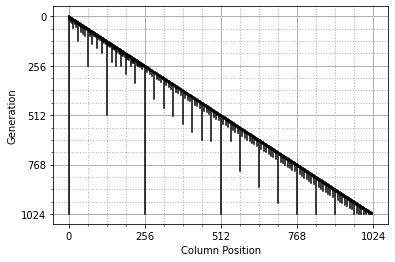

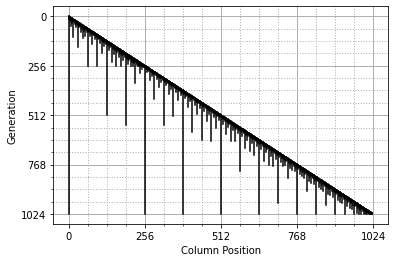

In [13]:
num_layers = 1024
for r in 4, 8:
    algo = hstrat1x.geom_seq_nth_root_algo
    policy = algo.Policy(r)
    pred_ = algo._enact._GenDropRanks_._FromPredKeepRank._PredKeepRank(None)
    pred = lambda sr, nsd: pred_(policy, nsd, sr)
    tp.tee(
        tweaked_stratum_retention_drip_plot,
        do_show=False,
        stratum_retention_predicate=pred,
        num_generations=num_layers,
        teeplot_outattrs={
            **nbm.collate_outattr_metadata(),
            **{
                'num_layers' : num_layers,
                'r' : r,
                'stratum_retention_predicate' : 'geom-seq-nth-root',
            },
        }
    )


teeplots/num_layers=1024+r=8+stratum_retention_predicate=recency-proportional-resolution-curbed+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/num_layers=1024+r=8+stratum_retention_predicate=recency-proportional-resolution-curbed+viz=tweaked-stratum-retention-drip-plot+ext=.png
teeplots/num_layers=1024+r=64+stratum_retention_predicate=recency-proportional-resolution-curbed+viz=tweaked-stratum-retention-drip-plot+ext=.pdf
teeplots/num_layers=1024+r=64+stratum_retention_predicate=recency-proportional-resolution-curbed+viz=tweaked-stratum-retention-drip-plot+ext=.png


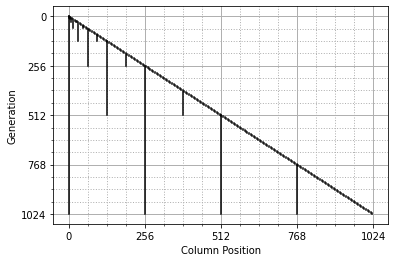

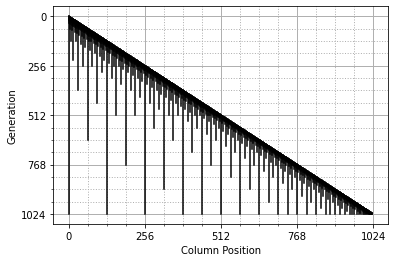

In [14]:
num_layers = 1024
for r in 8, 64:
    algo = hstrat1x.recency_proportional_resolution_curbed_algo
    policy = algo.Policy(r)
    pred_ = algo._enact._GenDropRanks_._FromPredKeepRank._PredKeepRank(None)
    pred = lambda sr, nsd: pred_(policy, nsd, sr)
    tp.tee(
        tweaked_stratum_retention_drip_plot,
        do_show=False,
        stratum_retention_predicate=pred,
        num_generations=num_layers,
        teeplot_outattrs={
            **nbm.collate_outattr_metadata(),
            **{
                'num_layers' : num_layers,
                'r' : r,
                'stratum_retention_predicate' : 'recency-proportional-resolution-curbed',
            },
        }
    )
